In [208]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [209]:
header = ['sex', 'size_1', 'size_2', 'size_3', 'weight_1', 'weight_2', 'weight_3', 'weight_4' , 'target']
df = pd.read_csv("/Users/alekseychernenko/Downloads/train.csv", header=None, names=header)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
sex         10579 non-null object
size_1      10047 non-null float64
size_2      10051 non-null float64
size_3      10044 non-null float64
weight_1    10055 non-null float64
weight_2    10053 non-null float64
weight_3    10073 non-null float64
weight_4    10019 non-null float64
target      10579 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 743.9+ KB


In [212]:
df.isnull().values.any()

True

In [213]:
df.describe()
df.columns
df.interpolate(method='linear', axis=0, limit=None, inplace=True, limit_direction='forward', limit_area=None, downcast=None)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
sex         10579 non-null object
size_1      10579 non-null float64
size_2      10579 non-null float64
size_3      10579 non-null float64
weight_1    10579 non-null float64
weight_2    10579 non-null float64
weight_3    10578 non-null float64
weight_4    10579 non-null float64
target      10579 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 743.9+ KB


In [215]:
#почему-то не отрабатывает на одну строчку, выкинем ее


In [216]:
df.dropna(inplace = True)

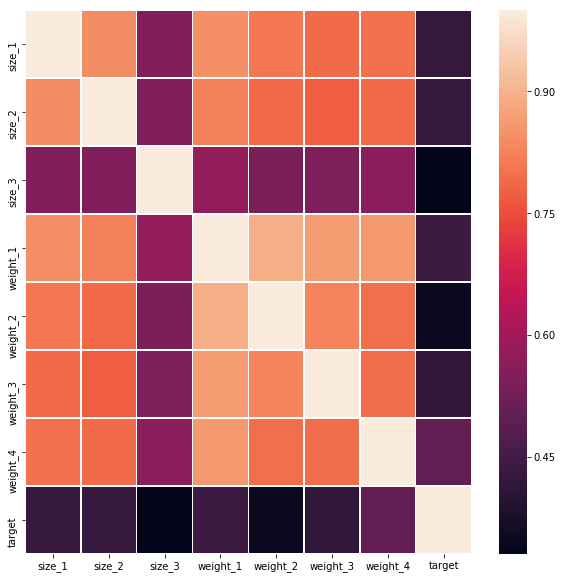

In [217]:
df.head(20)
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df.corr()
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           linewidths=.5, ax=ax
          )

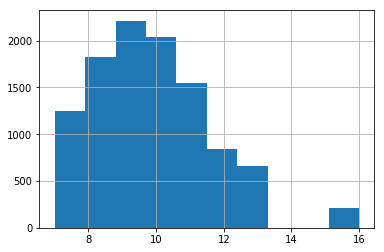

In [218]:
#таргет корр близка к 0 - плохо :(
#weight_1 сильно корр со всеми фичами - можем попробовать дропнуть
df = df.drop(columns= ['weight_1'])
df['target'].hist()

In [219]:
df.head(10)

,sex,size_1,size_2,size_3,weight_2,weight_3,weight_4,target
1,M,2.37150,1.8360,0.5355,1.222069,0.545700,1.378732,9
2,M,2.49900,2.0145,0.7140,1.129650,0.650250,0.765000,11
3,M,3.21300,2.5245,0.8160,2.534700,1.127100,1.606500,12
4,M,2.93250,2.2185,0.6885,2.203200,1.254302,1.874250,10
5,M,3.64650,2.7285,0.9690,4.533900,1.596300,2.142000,10
6,M,3.17475,2.8050,1.0455,5.638050,2.677500,2.060400,10
7,M,2.70300,2.2185,0.6885,1.670250,0.670650,1.122000,12
8,F,3.21300,2.5500,0.7905,1.871700,1.014900,1.198500,16
9,M,2.80500,2.2440,0.7905,1.858950,0.869550,1.275000,8
10,M,2.49900,1.9380,0.7140,1.175550,0.724200,0.994500,13


In [220]:
df = pd.get_dummies(df)
df.head(5)
df = df[df['sex_?'] != 1]
df = df[df['sex_--'] != 1]
#дропнем значения для пустых полей в поле стати

In [221]:
df = df.drop(columns = ['sex_--', 'sex_?'])

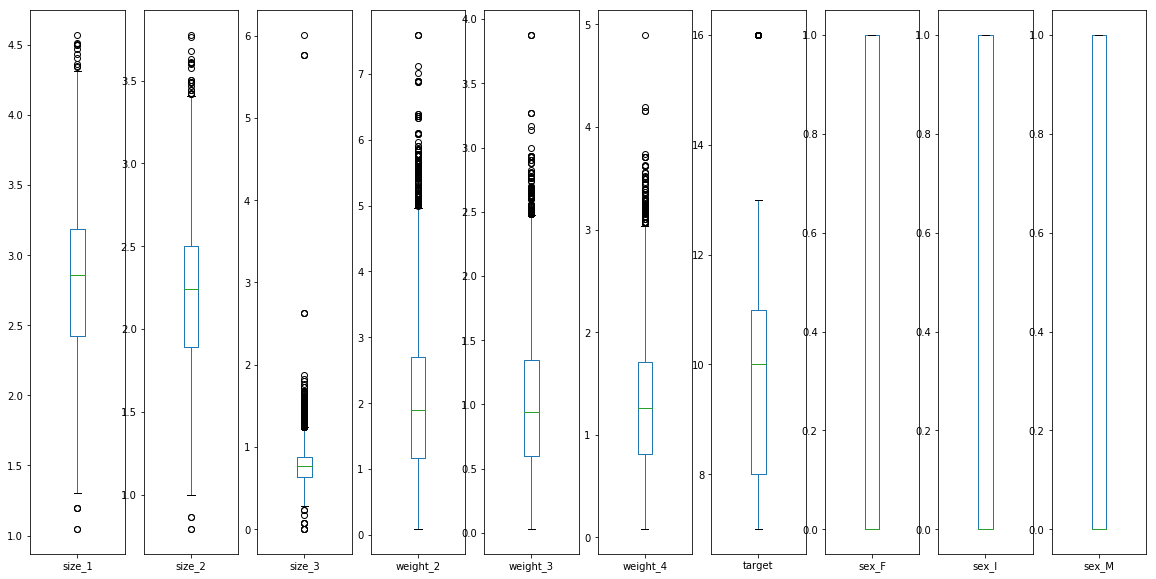

In [222]:
ax = df[df.columns[:10]].plot(subplots=True, kind='box', figsize=(20,10))


In [233]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_feat = df.loc[:,'size_1':'weight_4']
df_feat
df_scaled = pd.DataFrame(ss.fit_transform(df_feat),columns = df_feat.columns)
df_scaled = df_scaled.join(df.loc[:,'target':'sex_M'])
df_scaled = df_scaled.dropna(axis='rows')
df_scaled.isnull().values.any()

False

In [235]:
y = df_scaled.loc[:,'target']
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2)

In [236]:
df = df_scaled

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
predicted = cross_val_predict(clf, df, y, cv=20) 
from sklearn.metrics import f1_score
f1_score(y, predicted, average=None)


array([1.        , 0.6401421 , 0.68672282, 0.60985761, 0.19011407,
       0.00255754, 0.23884892, 1.        ])

In [250]:

clf = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train)
predicted = cross_val_predict(clf, df, y, cv=20) 
from sklearn.metrics import f1_score
f1_score(y, predicted, average=None)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.97710583, 0.51843513, 0.31668892, 0.34465195, 0.29102564,
       0.29688325, 0.44847328, 0.        ])

In [251]:
clf = Perceptron(tol=1e-3, random_state=0).fit(X_train, y_train)
predicted = cross_val_predict(clf, df, y, cv=20) 
from sklearn.metrics import f1_score
f1_score(y, predicted, average=None)

array([0.43540873, 0.15969939, 0.30599429, 0.28351754, 0.19308701,
       0.07653575, 0.19854722, 0.1031746 ])

In [252]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier(random_state=0).fit(X_train, y_train)
from sklearn.metrics import f1_score
f1_score(y, predicted, average=None)

KeyboardInterrupt: 

In [253]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3).fit(X_train, y_train)
predicted = cross_val_predict(clf, df, y, cv=20) 

In [254]:
from sklearn.metrics import f1_score
f1_score(y, predicted, average=None)

array([0.85426654, 0.27118644, 0.31095406, 0.28791469, 0.17928437,
       0.06482364, 0.11055276, 0.        ])